In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [5]:
# Récupérer les données

#iris = load_iris()
#L = iris.data
#y = iris.target

data = pd.read_csv("input/TP1_Heart_disease_reg.csv")
#iris = load_iris()
X = data.drop(["age"], axis=1)
y = data["age"]


In [6]:
#y = pd.DataFrame(L).iloc[:, 0]
#X = pd.DataFrame(L).iloc[:, 1:4]


# Modélisons

## Split des bases

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (242, 12)
Test set: (61, 12)


## Modèles

### 1er modèle : KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [10]:
# déclaration de l'intention de knn
knn = KNeighborsRegressor(n_neighbors=1)

In [11]:
# Entrainement du modèle
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [18]:
cross_val_score(KNeighborsRegressor(1), X_train, y_train, cv=5).mean()

-0.6583269323174271

In [19]:
print('train score:', knn.score(X_train, y_train))

train score: 1.0


# Evaluation

## Evaluation simple

In [29]:
# Evaluation
from sklearn import metrics
print('test Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn.predict(X_test)))  
print('test Mean Squared Error:', metrics.mean_squared_error(y_test, knn.predict(X_test)))  
print('test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn.predict(X_test))))
print('test R2:', r2_score(y_test, knn.predict(X_test)))

"\n"


print('train Mean Absolute Error:', metrics.mean_absolute_error(y_train, knn.predict(X_train)))  
print('train Mean Squared Error:', metrics.mean_squared_error(y_train, knn.predict(X_train)))  
print('train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, knn.predict(X_train))))
print('train R2:', r2_score(y_train, knn.predict(X_train)))

test Mean Absolute Error: 10.475409836065573
test Mean Squared Error: 168.01639344262296
test Root Mean Squared Error: 12.96211377216783
test R2: -0.8315618939362865
train Mean Absolute Error: 0.0
train Mean Squared Error: 0.0
train Root Mean Squared Error: 0.0
train R2: 1.0


### Déterminons le k optimal de façon manuelle

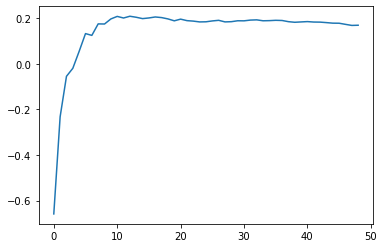

In [13]:
from sklearn.model_selection import cross_val_score
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsRegressor(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

## Courbe d'apprentissage

In [14]:
from sklearn.model_selection import learning_curve

In [15]:
N, train_score, val_score = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

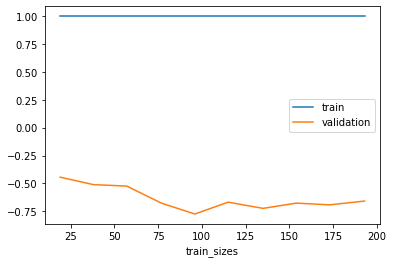

In [16]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## 2eme modèle

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(max_depth=2, random_state=0)

In [37]:
# Entrainement du modèle
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [38]:
# Evaluation
from sklearn import metrics

print('test Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf.predict(X_test)))  
print('test Mean Squared Error:', metrics.mean_squared_error(y_test, rf.predict(X_test)))  
print('test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))
print('test R2:', r2_score(y_test, rf.predict(X_test)))

"\n"


print('train Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf.predict(X_train)))  
print('train Mean Squared Error:', metrics.mean_squared_error(y_train, rf.predict(X_train)))  
print('train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, rf.predict(X_train))))
print('train R2:', r2_score(y_train, rf.predict(X_train)))

test Mean Absolute Error: 6.372096961746862
test Mean Squared Error: 66.2563028702545
test Root Mean Squared Error: 8.139797471083325
test R2: 0.27773405270896356
train Mean Absolute Error: 5.894369257227763
train Mean Squared Error: 51.6450413996942
train Root Mean Squared Error: 7.186448455231151
train R2: 0.352917170962019


## 3eme modèle : L'arbre de décision

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [42]:
# Entrainement du modèle
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
# Evaluation
from sklearn import metrics
print('test Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt.predict(X_test)))  
print('test Mean Squared Error:', metrics.mean_squared_error(y_test, dt.predict(X_test)))  
print('test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt.predict(X_test))))
print('test R2:', r2_score(y_test, dt.predict(X_test)))

"\n"


print('train Mean Absolute Error:', metrics.mean_absolute_error(y_train, dt.predict(X_train)))  
print('train Mean Squared Error:', metrics.mean_squared_error(y_train, dt.predict(X_train)))  
print('train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, dt.predict(X_train))))
print('train R2:', r2_score(y_train, rf.predict(X_train)))

test Mean Absolute Error: 8.573770491803279
test Mean Squared Error: 132.60655737704917
test Root Mean Squared Error: 11.515492059701538
test R2: -0.4455560698654133
train Mean Absolute Error: 0.0
train Mean Squared Error: 0.0
train Root Mean Squared Error: 0.0
train R2: 0.352917170962019


## 4eme modèle : Les regressions

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

### transformation des variables

In [45]:
# modèles

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
    

### entrainement du modèle

In [51]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

LinearRegression()

### Evaluation du modèle

In [52]:
y_train_predict = linreg.predict(X_train_poly)
y_test_predict = linreg.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mse_train))
r2_train = r2_score(y_train, y_train_predict)


mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = (np.sqrt(mse_test))
r2_test = r2_score(y_test, y_test_predict)


In [53]:
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('mse du train {}'.format(mse_train), ' et test {}'.format(mse_test))
print("L'erreur quadratique moyenne du train est {}".format(rmse_train), " et test est {}".format(rmse_test))
print('le score R2 du train est {}'.format(r2_train), ' et test est {}'.format(r2_test))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
mse du train 1.497909371666909e-16  et test 13015.436632901336
L'erreur quadratique moyenne du train est 1.223891078350892e-08  et test est 114.08521653966098
le score R2 du train est 1.0  et test est -140.8824513567796


